# Prosper Loan Data
### by Hazem Samir Abdallah


## Table of Contents
<ul>
<li><a href="#wrangling">Preliminary Wrangling</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
</ul>

<a id='wrangling'></a>
## Preliminary Wrangling

The purpose of this document is to explore loan data as provided in the Prosper dataset. This dataset consists of 113,937 rows and 81 columns. Each row is an individual loan record. The 81 variables include loan details such as loan amount, interest rate, loan status, borrower monthly income...etc.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#reading in the dataset to a DataFrame and viewing info()
df_full = pd.read_csv('prosperLoanData.csv')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [3]:
#view top 5 rows in addition to visual assessment in a spreadsheet program
df_full.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In the following few parts, some data wrangling prcedures will be carried out to address some basic issues in the data just to get it in shape for visualization.

In [4]:
#check for duplicate rows
df_full.duplicated().sum()

0

In [5]:
#reassigning df to variables of preliminary interest to minimize distractions
focus_ls = ['ListingCreationDate',
            'Term',
            'LoanOriginalAmount',
            'BorrowerRate',
            'LenderYield',
            'ProsperRating (Alpha)',
            'ListingCategory (numeric)',
            'IsBorrowerHomeowner',
            'DebtToIncomeRatio',
            'StatedMonthlyIncome',
            'LoanStatus',
            'PercentFunded']
            
df = df_full[focus_ls]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingCreationDate        113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   LoanOriginalAmount         113937 non-null  int64  
 3   BorrowerRate               113937 non-null  float64
 4   LenderYield                113937 non-null  float64
 5   ProsperRating (Alpha)      84853 non-null   object 
 6   ListingCategory (numeric)  113937 non-null  int64  
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   DebtToIncomeRatio          105383 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  LoanStatus                 113937 non-null  object 
 11  PercentFunded              113937 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 9.7+ MB


In [6]:
#change data type of ListingCreationDate
df.loc[:, 'ListingCreationDate'] = pd.to_datetime(df.loc[:, 'ListingCreationDate'])

/Users/hazemsamir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [7]:
#replace values, change data type and renaming of ListingCategory (numeric)
ListingCategory_dict = {0: 'Not Available',
                        1: 'Debt Consolidation',
                        2: 'Home Improvement',
                        3: 'Business',
                        4: 'Personal Loan',
                        5: 'Student Use',
                        6: 'Auto',
                        7: 'Other',
                        8: 'Baby&Adoption',
                        9: 'Boat',
                        10: 'Cosmetic Procedure',
                        11: 'Engagement Ring',
                        12: 'Green Loans',
                        13: 'Household Expenses',
                        14: 'Large Purchases',
                        15: 'Medical/Dental',
                        16: 'Motorcycle',
                        17: 'RV',
                        18: 'Taxes',
                        19: 'Vacation',
                        20: 'Wedding Loans'}

df['ListingCategory'] = df['ListingCategory (numeric)'].replace(ListingCategory_dict)
df['ListingCategory'] = df['ListingCategory'].astype('category')
df.drop(columns='ListingCategory (numeric)', inplace=True)

<ipython-input-7-c1b5a0ad4c40>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ListingCategory'] = df['ListingCategory (numeric)'].replace(ListingCategory_dict)
<ipython-input-7-c1b5a0ad4c40>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ListingCategory'] = df['ListingCategory'].astype('category')
/Users/hazemsamir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in t

In [8]:
#change data type of ProsperRating
ProsperRating_ls = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ProsperRating_dtype = pd.api.types.CategoricalDtype(categories=ProsperRating_ls, ordered=True)
df['ProsperRating'] = df['ProsperRating (Alpha)'].astype(ProsperRating_dtype)
df.drop(columns='ProsperRating (Alpha)', inplace=True)

<ipython-input-8-88307ee2f067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProsperRating'] = df['ProsperRating (Alpha)'].astype(ProsperRating_dtype)


In [9]:
#view df info and a sample of the data after wrangling
print(df.info())
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113937 non-null  datetime64[ns]
 1   Term                 113937 non-null  int64         
 2   LoanOriginalAmount   113937 non-null  int64         
 3   BorrowerRate         113937 non-null  float64       
 4   LenderYield          113937 non-null  float64       
 5   IsBorrowerHomeowner  113937 non-null  bool          
 6   DebtToIncomeRatio    105383 non-null  float64       
 7   StatedMonthlyIncome  113937 non-null  float64       
 8   LoanStatus           113937 non-null  object        
 9   PercentFunded        113937 non-null  float64       
 10  ListingCategory      113937 non-null  category      
 11  ProsperRating        84853 non-null   category      
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(2), object

,ListingCreationDate,Term,LoanOriginalAmount,BorrowerRate,LenderYield,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanStatus,PercentFunded,ListingCategory,ProsperRating
9721,2006-12-26 15:54:47.080,36,2550,0.2500,0.2450,True,0.12,4000.000000,Completed,1.0,Not Available,NaN
30326,2006-08-05 10:47:57.560,36,3000,0.2900,0.2850,False,0.03,4166.666667,Chargedoff,1.0,Not Available,NaN
66250,2009-10-22 17:25:21.823,36,17000,0.1150,0.1050,True,0.20,6895.833333,Completed,1.0,Debt Consolidation,AA
7586,2011-02-07 20:57:16.713,36,6277,0.1999,0.1899,False,0.11,2666.666667,Completed,1.0,Auto,C
5550,2013-07-10 05:27:17.097,60,15000,0.1579,0.1479,True,0.37,5000.000000,Current,1.0,Debt Consolidation,B


In [10]:
df.describe()

,Term,LoanOriginalAmount,BorrowerRate,LenderYield,DebtToIncomeRatio,StatedMonthlyIncome,PercentFunded
count,113937.000000,113937.00000,113937.000000,113937.000000,105383.000000,1.139370e+05,113937.000000
mean,40.830248,8337.01385,0.192764,0.182701,0.275947,5.608026e+03,0.998584
std,10.436212,6245.80058,0.074818,0.074516,0.551759,7.478497e+03,0.017919
min,12.000000,1000.00000,0.000000,-0.010000,0.000000,0.000000e+00,0.700000
25%,36.000000,4000.00000,0.134000,0.124200,0.140000,3.200333e+03,1.000000
50%,36.000000,6500.00000,0.184000,0.173000,0.220000,4.666667e+03,1.000000
75%,36.000000,12000.00000,0.250000,0.240000,0.320000,6.825000e+03,1.000000
max,60.000000,35000.00000,0.497500,0.492500,10.010000,1.750003e+06,1.012500


In [11]:
#viewing unique values in Term to understand the nature of this numeric variable
df.Term.unique()

array([36, 60, 12])

In [12]:
#view data info starting July 2009 where ProperRating has been first introduced
df[df.ListingCreationDate > '2009-06-30'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingCreationDate  84853 non-null  datetime64[ns]
 1   Term                 84853 non-null  int64         
 2   LoanOriginalAmount   84853 non-null  int64         
 3   BorrowerRate         84853 non-null  float64       
 4   LenderYield          84853 non-null  float64       
 5   IsBorrowerHomeowner  84853 non-null  bool          
 6   DebtToIncomeRatio    77557 non-null  float64       
 7   StatedMonthlyIncome  84853 non-null  float64       
 8   LoanStatus           84853 non-null  object        
 9   PercentFunded        84853 non-null  float64       
 10  ListingCategory      84853 non-null  category      
 11  ProsperRating        84853 non-null  category      
dtypes: bool(1), category(2), datetime64[ns](1), float64(5), int64(2), object(1)
memory usag

In [13]:
#calculating null portion in DebtToIncomeRatio
df.DebtToIncomeRatio.isnull().sum() / df.shape[0] * 100

7.507657740681253

In [14]:
#viewing unique values in LoanStatus 
df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

***
### What is the structure of the dataset?

For the original dataset, this [data dictionary](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000) contains a list of all 81 variables along with their definitions. For the sake of this project, however, only a few of those variables are considered to be the main focus. The dataset contains 113,937 loan listings by Prosper. This [link](https://www.prosper.com/invest/how-to-invest/prosper-ratings/?mod=article_inline#:~:text=The%20Prosper%20Rating%20is%20our,average%20annualized%20loss%20rate%20range.&text=Learn%20about%20Prosper's%20verification%20process.) contains detailed explanation of how the Prosper ratings are developed. Additionally, a little bit of background about the Prosper [business model](https://www.prosper.com/invest/how-to-invest/search-listings/) is integral to understanding the dataset.

***numeric***
- `ListingCreationDate` date variable of when the listing was created
- `LoanOriginalAmount` integer variable of the original amount of the loan in USD
- `BorrowerRate` float variable of the loan interest rate
- `LenderYield` float variable of the loan interest rate omitting service fees
- `DebtToIncomeRatio` float variable of the borrower's debt to income ratio
- `StatedMonthlyIncome` float variable of the borrower's stated monthly income at the listing
- `PercentFunded` float variable of loan percent covered by investor funds

***categorical***
- `ListingCategory` categroy variable of the loan purpose (e.g. Student Use, Wedding Loans...etc)
- `ProsperRating` category variable of the loan rating assigned by Prosper at the time of listing ordered from 'HR'(worst) to 'AA'(best)
- `IsBorrowerHomeowner` bool variable of whether a borrower is a homeowner or not
- `LoanStatus` string variable of loan collection status (i.e. completed, chargedoff, cancelled, past due...etc)
- `Term` integer variable of the time length of the loan (months) (even though this is a numeric variable, it should be treated as ordinal categoricals as it has only 3 possible values which are 12, 36, or 60 months)

*Note: ProsperRating and DebtToIncomeRatio variables have some missing value but are still important to the analysis. Nonetheless, this should be borne in mind whenever any of those variables are included in the analysis. For data starting July 2009, only DebtToIncomeRatio has some missing values.*

### What is/are the main feature(s) of interest in the dataset?

The main interest is to investigate features which could possibly predict/affect 1- loan status and 2- borrower interest rate. It is important to point out that the goal of this analysis is not to build a predictive model but rather gain an understanding of correlations and interactions between variables and to highlight general data patterns and distributions.

### What are the features in the dataset which will help support the investigation into the feature(s) of interest?

1. It is expected that explanatory variables such as Prosper rating, borrower's income, borrower's debt to income ratio, and borrower's home ownership could have a strong relationship with loan status.

2. As for the borrower rate, variables like loan amount, loan term, and Prosper rating might be correlated to the interest rate.
***

<a id='univariate'></a>
## Univariate Exploration

**Investigating LoanOriginalAmount**

In [15]:
print(df.LoanOriginalAmount.describe())
np.log10(df.LoanOriginalAmount).describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64


count    113937.000000
mean          3.795130
std           0.345610
min           3.000000
25%           3.602060
50%           3.812913
75%           4.079181
max           4.544068
Name: LoanOriginalAmount, dtype: float64

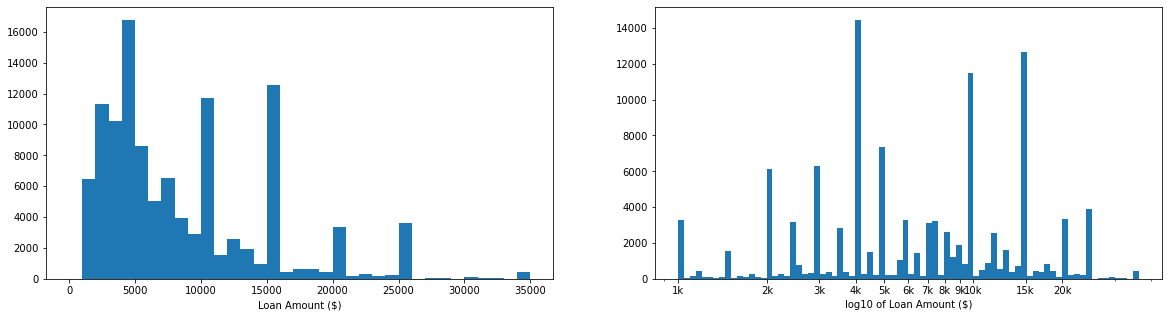

In [16]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, df['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data=df, x='LoanOriginalAmount', bins=bins)
plt.xlabel('Loan Amount ($)')

plt.subplot(1, 2, 2)
log_binsize = 0.02
bins = 10 ** np.arange(np.log10(df['LoanOriginalAmount'].min()),
                       np.log10(df['LoanOriginalAmount'].max())+log_binsize, log_binsize)
plt.hist(data=df, x='LoanOriginalAmount', bins=bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 3e3, 4e3, 5e3, 6e3, 7e3, 8e3, 9e3, 1e4, 1.5e4, 2e4],
           ['1k', '2k', '3k', '4k', '5k', '6k', '7k', '8k', '9k', '10k', '15k', '20k'])
plt.xlabel('log10 of Loan Amount ($)');

At first sight, LoanOriginalAmount is multi modal at 5k intervals which makes sense that loan amounts are practically leaning towards a discrete market convention (i.e. USD 5000, USD 10,000, USD 15,000). Behind this cyclical modality, most of the data points are before the 15,000 mark and some minimal points going up to 40,000. It might be better to look at this right tailing by transforming the USD axis to a log scale. Not much is found from the log transformation but it looks like the highest distributions are at 4k followed by 15k then 10k. Generally speaking though, there is a peak at every 1000 mark point.

<ipython-input-17-17d24dcdfead>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LoanSize'] = pd.cut(df['LoanOriginalAmount'], [0, 4000, 10000, 40000], labels=['small', 'medium', 'large'])


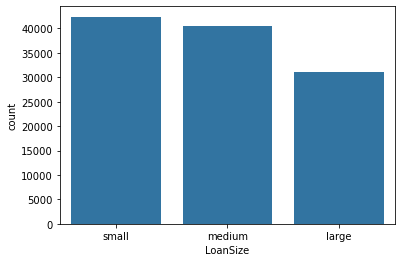

In [17]:
#cutting loan LoanOriginalAmount into LoanSize categories to add an option for qualitative visualization
df['LoanSize'] = pd.cut(df['LoanOriginalAmount'], [0, 4000, 10000, 40000], labels=['small', 'medium', 'large'])

base_color = sb.color_palette()[0]
sb.countplot(data=df, x='LoanSize', color=base_color);

**Investigating BorrowerRate and LenderYield**

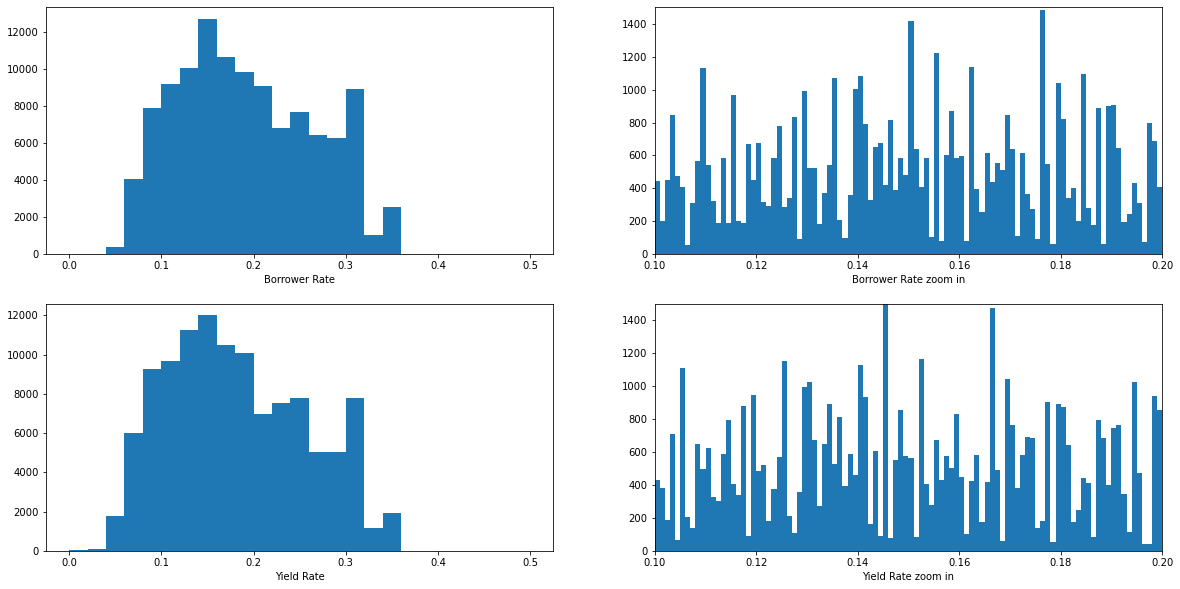

In [18]:
plt.figure(figsize=[20, 10])

plt.subplot(2, 2, 1)
bins = np.arange(0, df['BorrowerRate'].max()+0.02, 0.02)
ax1 = plt.hist(data=df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate')

plt.subplot(2, 2, 2)
bins = np.arange(0, df['BorrowerRate'].max()+0.001, 0.001)
ax2 = plt.hist(data=df, x='BorrowerRate', bins=bins)
plt.xlabel('Borrower Rate zoom in')
plt.xlim(0.1, 0.2)
plt.ylim(0, 1500);

plt.subplot(2, 2, 3)
bins = np.arange(0, df['LenderYield'].max()+0.02, 0.02)
ax3 = plt.hist(data=df, x='LenderYield', bins=bins)
plt.xlabel('Yield Rate')

plt.subplot(2, 2, 4)
bins = np.arange(0, df['LenderYield'].max()+0.001, 0.001)
ax4 = plt.hist(data=df, x='LenderYield', bins=bins)
plt.xlabel('Yield Rate zoom in')
plt.xlim(0.1, 0.2)
plt.ylim(0, 1500);

Borrower Rate variable generally normally distributed with the highest frequency peak around 15%. The distribution however is not exactly unimodal as it keeps going through cyclical modality as shown in the zoomed in histogram in top right corner above. This is also vivid in the significant peak around 30% borrowing rate.

Same distribution is observed in the LenderYield.

**Investigating DebtToIncomeRatio**

In [19]:
print(df.DebtToIncomeRatio.describe())
np.log2(df.DebtToIncomeRatio).describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64


/Users/hazemsamir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    1.053830e+05
mean             -inf
std               NaN
min              -inf
25%     -2.836501e+00
50%     -2.184425e+00
75%     -1.643856e+00
max      3.323370e+00
Name: DebtToIncomeRatio, dtype: float64

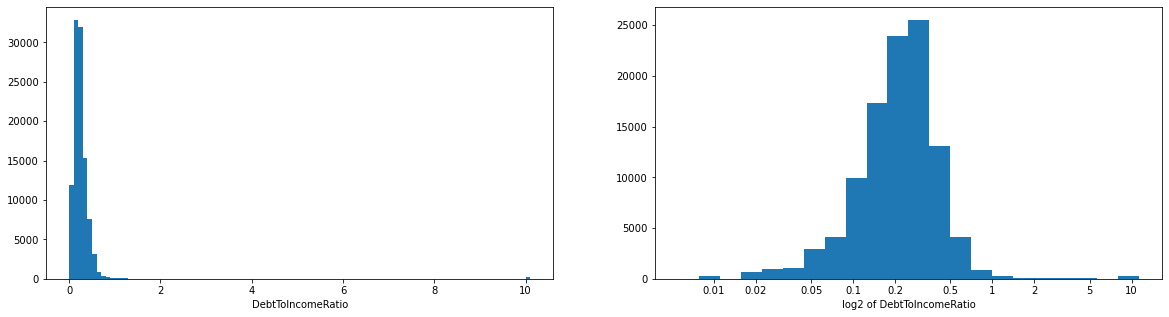

In [20]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, df['DebtToIncomeRatio'].max()+0.1, 0.1)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins)
plt.xlabel('DebtToIncomeRatio')

plt.subplot(1, 2, 2)
log_binsize = 0.5
bins = 2 ** np.arange(-7.5, np.log2(df['DebtToIncomeRatio'].max())+log_binsize, log_binsize)
plt.hist(data=df, x='DebtToIncomeRatio', bins=bins)
plt.xscale('log', base=2)
ticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
plt.xticks(ticks, ticks)
plt.xlabel('log2 of DebtToIncomeRatio');

Most data points for the DebtToIncomeRatio variable are below 0.5 but there are still a few ranging up to 10. This in turn causes the distribution to be extremely right skewed. However, the distribution log is almost normally distributed around 30% point mark. Even with a log depiction, there are still some outliers in both directions.

**Investigating StatedMonthlyIncome**

In [21]:
print(df.StatedMonthlyIncome.describe())
np.log2(df.StatedMonthlyIncome).describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64


count    1.139370e+05
mean             -inf
std               NaN
min              -inf
25%      1.164401e+01
50%      1.218818e+01
75%      1.273661e+01
max      2.073893e+01
Name: StatedMonthlyIncome, dtype: float64

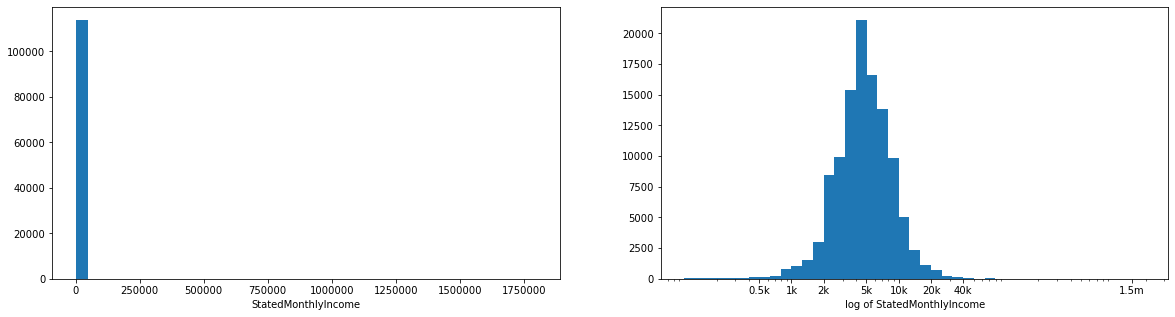

In [22]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, df['StatedMonthlyIncome'].max()+50000, 50000)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins)
plt.xlabel('StatedMonthlyIncome')
ticks = np.arange(0, df['StatedMonthlyIncome'].max(), 250000)
tick_labels = ['{:0.0f}'.format(v) for v in ticks]
plt.xticks(ticks, tick_labels)

plt.subplot(1, 2, 2)
log_binsize = 0.1
bins = 10 ** np.arange(2, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins)
plt.xscale('log', base=10)
plt.xticks([5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 1.5e6], ['0.5k', '1k', '2k', '5k', '10k', '20k', '40k', '1.5m'])
plt.xlabel('log of StatedMonthlyIncome');

The StatedMonthlyIncome variable is extremely skewed to the right which is only natural as underpinned by the economic laws of income distribution. The best way is to consider such variable is by viewing its log. As expected, the log is normally distributed with the highest peak just before the USD 5000 mark.

**Investigating PercentFunded**

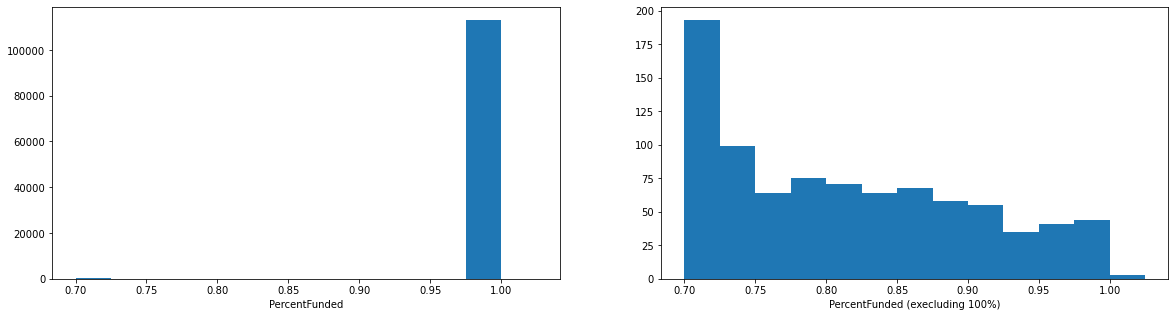

In [23]:
plt.figure(figsize=[20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(df['PercentFunded'].min(), df['PercentFunded'].max()+0.025, 0.025)
plt.hist(data=df, x='PercentFunded', bins=bins)
plt.xlabel('PercentFunded')

plt.subplot(1, 2, 2)
df_sub = df[df['PercentFunded'] != 1]
plt.hist(data=df_sub, x='PercentFunded', bins=bins)
plt.xlabel('PercentFunded (execluding 100%)');

Most of the data points in the PercentFunded variable is clustered at 100% meaning exactly funded. Over 800 loans, however are under funded with the least coverage at 70% which is the second highest peak.

In [24]:
#proportion of maximum value in value_counts() which is 1
df['PercentFunded'].value_counts().values[0] / df['PercentFunded'].value_counts().sum()

0.9923642012691224

In [25]:
df[df['PercentFunded'] > 1].shape[0]

3

In [26]:
df[df['PercentFunded'] < 1].shape[0]

867

**Investigating Term**

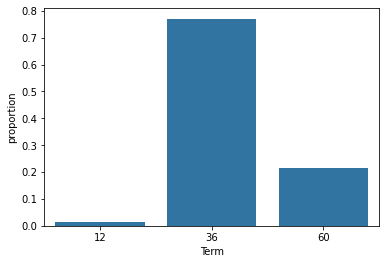

In [27]:
base_color = sb.color_palette()[0]

sb.countplot(data=df, x='Term', color=base_color)

total = df.Term.value_counts().sum()
max_prop = df.Term.value_counts(True).values[0]
tick_props = np.arange(0, max_prop+0.1, 0.1)
tick_names = ['{:0.1f}'.format(v) for v in tick_props]
plt.yticks(tick_props*total, tick_names)
plt.ylabel('proportion');

Even though Term is a numeric variable depicting the number of months a loan is borrowed, there are only 3 unique values which makes it more plausible to look at as categorical variable. Just below 80% of the loans has a 36 month period. Around 20% has 60 months and a tiny percentage has a 1 year term.

**Investigating IsBorrowerHomeowner**

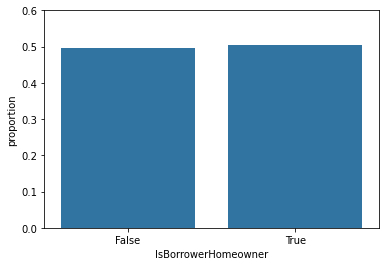

In [28]:
sb.countplot(data=df, x='IsBorrowerHomeowner', color=base_color)

total = df.IsBorrowerHomeowner.value_counts().sum()
max_prop = df.IsBorrowerHomeowner.value_counts(True).values[0]
tick_props = np.arange(0, max_prop+0.1, 0.1)
tick_names = ['{:0.1f}'.format(v) for v in tick_props]
plt.yticks(tick_props*total, tick_names)
plt.ylabel('proportion');

Looks like loan listings are almost divided in half between homeowners and non homeowners with a subtle higher proprtion in favor of homeowners.

**Investigating ProsperRating**

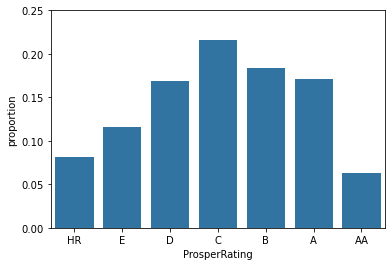

In [29]:
sb.countplot(data=df, x='ProsperRating', color=base_color)

total = df.ProsperRating.value_counts().sum()
max_prop = df.ProsperRating.value_counts(True).values[0]
tick_props = np.arange(0, max_prop+0.05, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.yticks(tick_props*total, tick_names)
plt.ylabel('proportion');

With over 20%, the highest proportion of loan listings has a 'C' rating. Most of the ratings are between 'A' to 'D'. The distribution is almost symmetric around the middle 'C' rating. 'AA' rating has the lowest proportion followed by 'HR'.

**Investigating LoanStatus**

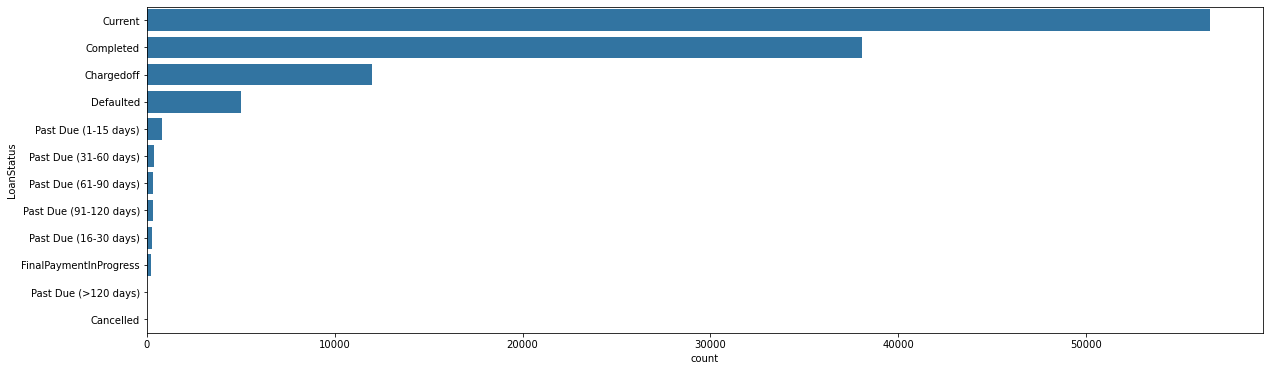

In [30]:
plt.figure(figsize=[20, 6])

order = df['LoanStatus'].value_counts().index
sb.countplot(data=df, y='LoanStatus', color=base_color, order=order);

'Current' is the status with highest proportion of loans followed by 'Completed'. Together, they make up 80% of the loans. About 15% of the loans are either defaulted or charged off. Some minimal distributions are past due or waiting for final payment processing.

It might be a good idea here to engineer a column that briefly summarizes the LoanStatus variable and has fewer summing categories and which could help reduce visual distractions.

In [31]:
df['LoanStatus'].value_counts(True)

Current                   0.496555
Completed                 0.334167
Chargedoff                0.105251
Defaulted                 0.044042
Past Due (1-15 days)      0.007074
Past Due (31-60 days)     0.003186
Past Due (61-90 days)     0.002747
Past Due (91-120 days)    0.002668
Past Due (16-30 days)     0.002326
FinalPaymentInProgress    0.001799
Past Due (>120 days)      0.000140
Cancelled                 0.000044
Name: LoanStatus, dtype: float64

<ipython-input-32-c930346e0ded>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['StatusSummary'] = df['LoanStatus'].replace(LoanStatus_dict)


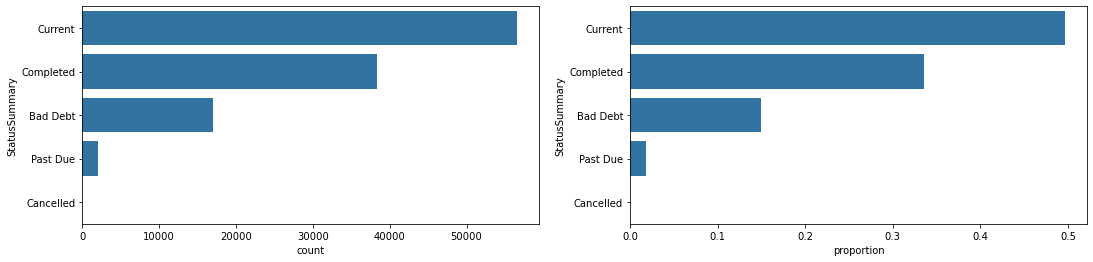

In [32]:
LoanStatus_dict = {'Current': 'Current', 'Cancelled': 'Cancelled',
                   'Chargedoff': 'Bad Debt', 'Defaulted': 'Bad Debt',
                   'Completed': 'Completed', 'FinalPaymentInProgress': 'Completed',
                   'Past Due (1-15 days)': 'Past Due', 'Past Due (31-60 days)': 'Past Due',
                   'Past Due (61-90 days)': 'Past Due', 'Past Due (91-120 days)': 'Past Due',
                   'Past Due (16-30 days)': 'Past Due', 'Past Due (>120 days)': 'Past Due'}
df['StatusSummary'] = df['LoanStatus'].replace(LoanStatus_dict)

plt.figure(figsize=[18, 4])

plt.subplot(1, 2, 1)
order = df['StatusSummary'].value_counts().index
sb.countplot(data=df, y='StatusSummary', color=base_color, order=order)

plt.subplot(1, 2, 2)
sb.countplot(data=df, y='StatusSummary', color=base_color, order=order)

total = df.StatusSummary.value_counts().sum()
max_prop = df.StatusSummary.value_counts(True).values[0]
tick_props = np.arange(0, max_prop+0.1, 0.1)
tick_names = ['{:0.1f}'.format(v) for v in tick_props]
plt.xticks(tick_props*total, tick_names)
plt.xlabel('proportion');

To reduce distraction a new variable `StatusSummary` has been derived from LoanStatus. The new variable provides 5 possible summary status options. It seems that about 50% of the loans are ongoing, about 35% completed, around 15% went bad and 2% are past dues. 'Bad Debt' is an engineered category that included both defaults and chargeoffs due to how similar they are. 

**Investigating ListingCategory**

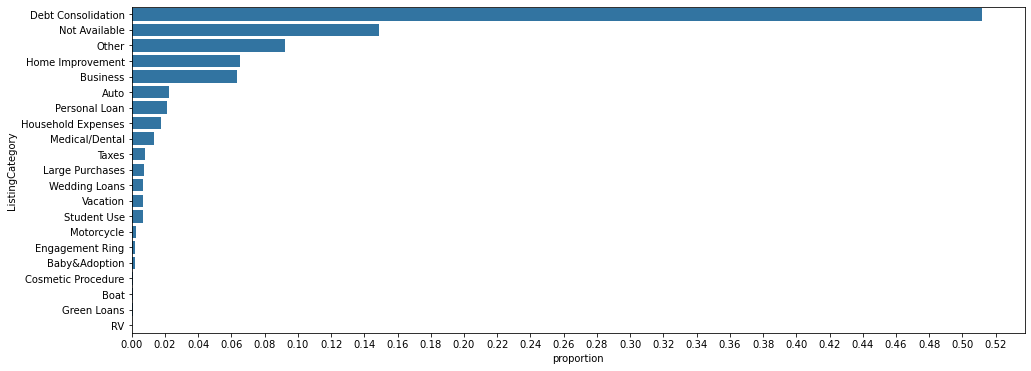

In [33]:
plt.figure(figsize=[16, 6])
order = df['ListingCategory'].value_counts().index

sb.countplot(data=df, y='ListingCategory', color=base_color, order=order)

total = df.ListingCategory.value_counts().sum()
max_prop = df.ListingCategory.value_counts(True).values[0]
tick_props = np.arange(0, max_prop+0.02, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.xticks(tick_props*total, tick_names)
plt.xlabel('proportion');

Looks like over half of the loan listings are requested for debt consolidation purposes. On the second place, each of the home improvement and business categories has about 7% of all loan listings. All other categories are under 3%.

In [34]:
df[~df.ListingCategory.isin(['Not Available', 'Other'])]['ListingCategory'].value_counts()[:12].sum()/df.shape[0]

0.7501601762377454

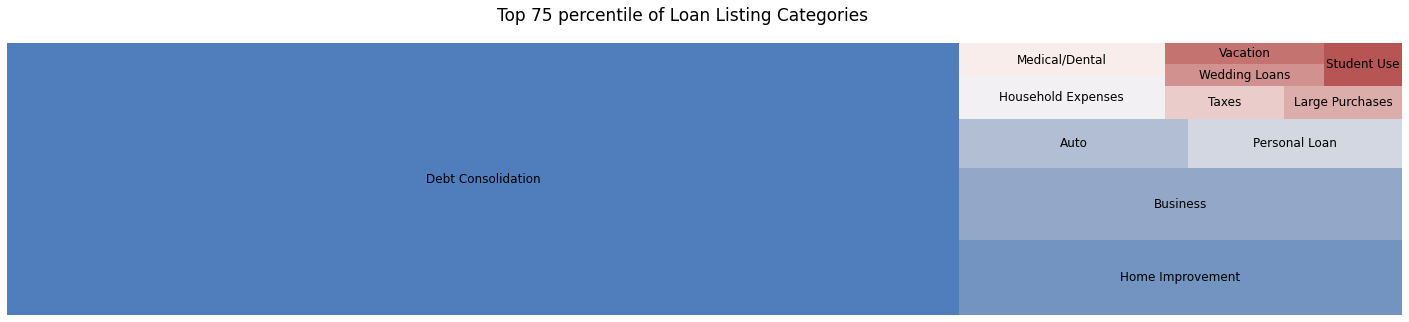

In [35]:
#creating a treemap for the top 75% listing categories
import squarify

df_sub = df[~df.ListingCategory.isin(['Not Available', 'Other'])]

volume = df_sub.ListingCategory.value_counts().values[:12]
labels = df_sub.ListingCategory.value_counts().index[:12]
color_list = sb.color_palette('vlag', n_colors=12)

plt.figure(figsize=[25, 5])
plt.rc('font', size=12)
squarify.plot(sizes=volume, label=labels,
              color=color_list)
plt.axis('off')
plt.suptitle('Top 75 percentile of Loan Listing Categories', size=17);

**Investigating ListingCreationDate**

In [36]:
df.loc[:, 'ListingCreationYear'] = df.loc[:, 'ListingCreationDate'].dt.year

/Users/hazemsamir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/hazemsamir/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


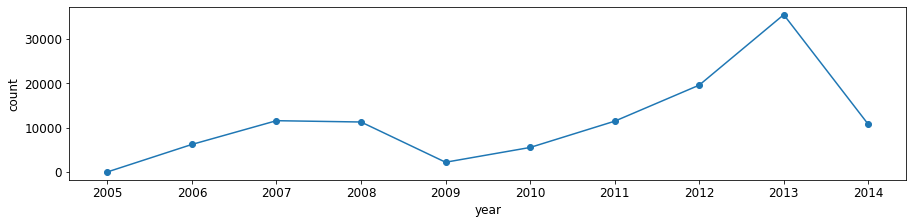

In [37]:
#group by to get count of any variable to use on the y axis
df_year = df.groupby('ListingCreationYear', as_index=False)['Term'].count()

plt.figure(figsize=[15, 7])

plt.subplot(2, 1, 1)
plt.plot(df_year.ListingCreationYear, df_year.Term, marker='o')
year_ticks = np.arange(2005, 2014+1, 1)
plt.xticks(year_ticks, year_ticks)
plt.xlabel('year')
plt.ylabel('count');

2005 to 2007 witnesses an upward trend in the count of loan listings. Beginning 2007 until 2009, there is steadiness followed by a  noticeable decline which could be easily attributed to the global financial crisis. From 2009 to 2013, an upward rising trend is noticed. The sharp decline in 2014 is only because the dataset coverage stops at March.

In [38]:
df[df.ListingCreationDate >= '2014-01-01']['ListingCreationDate'].dt.month.unique()

array([2, 1, 3])

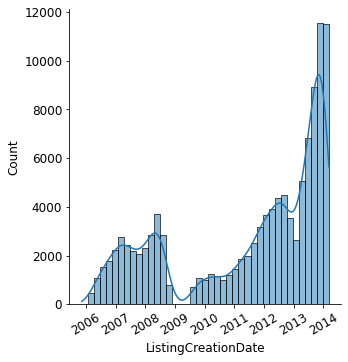

In [39]:
sb.displot(data=df, x='ListingCreationDate', kde=True)
plt.xticks(rotation=30);

### Discussing the distribution(s) of the variable(s) of interest. Were there any unusual points or transformations?

DebtToIncomeRatio and StatedMonthlyIncome have been transformed to log distributions which should be considered in any following visualizations using those variables.

BorrowerRate has a kind of cyclical modality with the highest peaks around 15% and 30%. LoanStatus shows over 80% of loans are either current or completed whereas around 15% are either chargedoff or defaulted.

### Of the features investigated, were there any unusual distributions? Were there any operations performed on the data to tidy, adjust, or change the form of the data?

Another way to look at LoanOriginalAmount is by cutting it into 3 size categories; a variable has been engineered to explore this further during bivariate and/or multivariate visualization. Likewise, a StatusSummary variable has been derived from LoanStatus to reduce distraction of between several similar statuses with low proportions.

Additionally, during the wrangling phase, numeric category references in the ListingCateogory variable have been replaced with category description to help with interpretations. Finally, when using the LisitingDate variable, the drop in year 2014 distributions is because the data coverage ends at March of that year. 

<a id='bivariate'></a>
## Bivariate Exploration

Let us first start by viewing a PairPlot a correlation heatmap of numeric variables to spot possible correlations to pursue further.

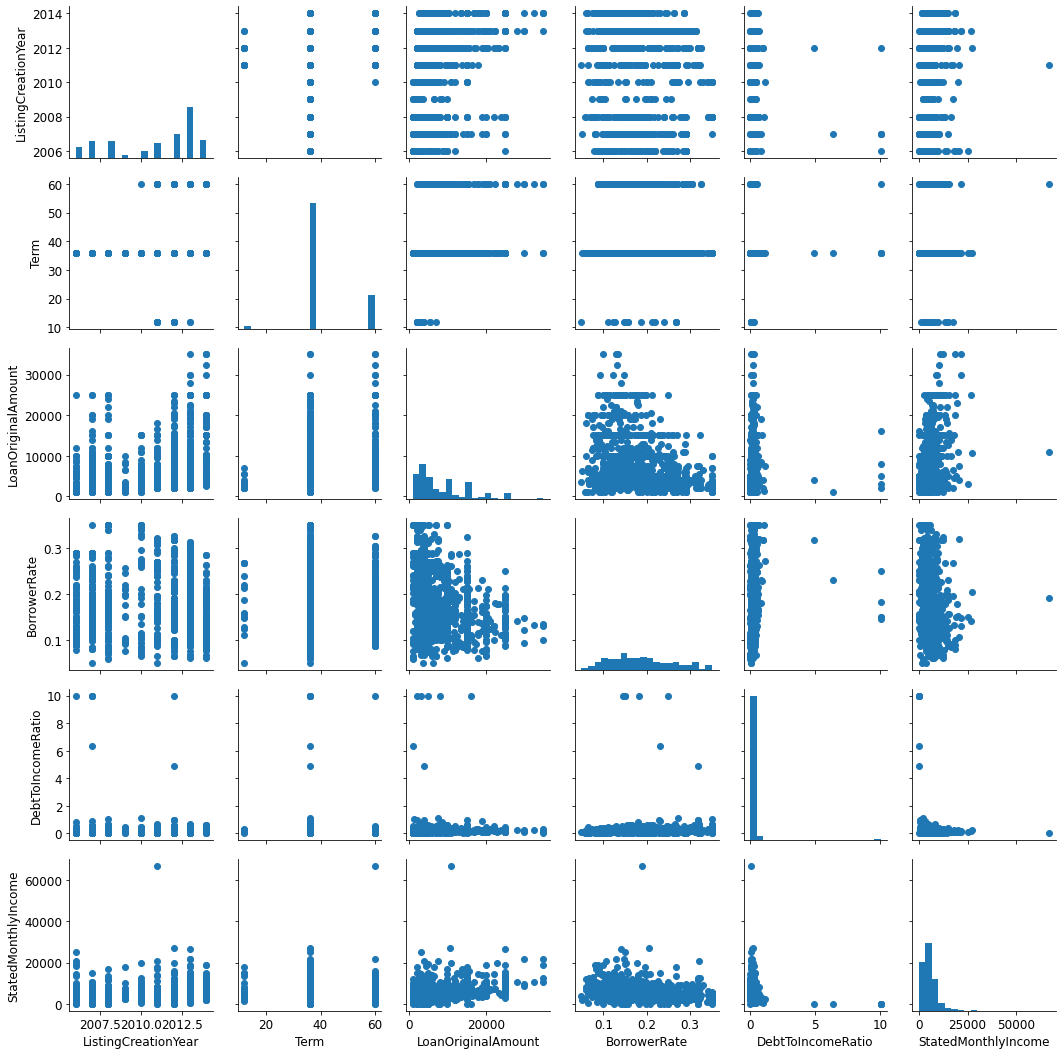

In [40]:
df_sample = df.sample(1000)
numeric_vars = ['ListingCreationYear', 'Term',
                'LoanOriginalAmount', 'BorrowerRate',
                'DebtToIncomeRatio',
                'StatedMonthlyIncome']

g = sb.PairGrid(data=df_sample, vars=numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

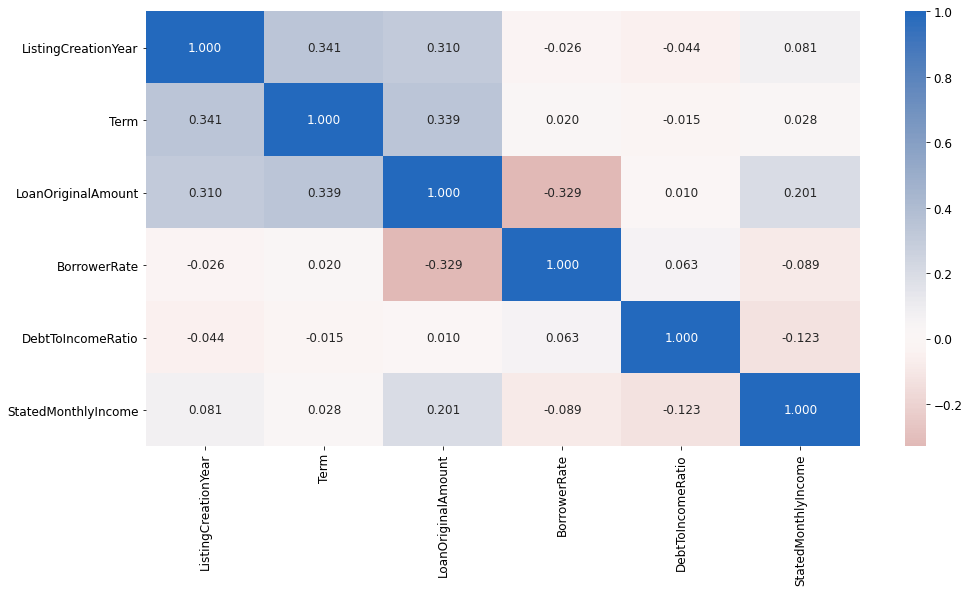

In [41]:
plt.figure(figsize=[16, 8])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

From the about charts, there is good evidence of a correlation, though not a strong one, between LoanOriginalAmount against Term and LoanOriginalAmount against BorrowerRate. Additionally, LisitngCreationYear seem to be correlated with Term and LoanOriginalAmount. So let us keep this in mind while proceeing witht he bivariate explorations.

Let us now turn to investigating loan status against other variables.

**Investigating Loan Status against Proper Rating**

*The code for the stacked chart below is referenced from Udacity classroom's following* [link](https://classroom.udacity.com/nanodegrees/nd002-ent/parts/9c2eb5bf-2bda-4e0c-85bf-d997082a8571/modules/9b9bd2f7-e891-4545-adb0-e57eb8efba81/lessons/8d08820f-00ab-4834-babd-cd33eae50104/concepts/28e18872-f2c7-4940-b9de-560c8c47a060 ).

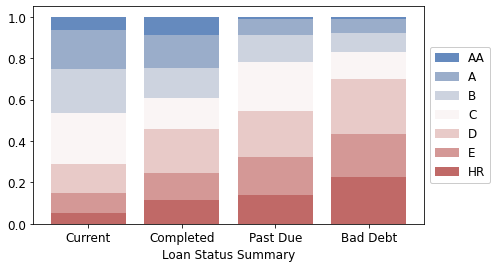

In [42]:
df_sub = df[df.ListingCreationDate > '2009-06-30'] #focusing on loans with available ratings 
status_order = ['Current', 'Completed', 'Past Due', 'Bad Debt']
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
color_order = sb.color_palette('vlag_r', 7)

bars_ls = []
baselines = np.zeros(len(status_order))
cat1_counts = df_sub['StatusSummary'].value_counts()

plt.figure(figsize=[7, 4])

for i in range(len(rating_order)):
    rating = rating_order[i]
    inner_counts = df_sub[df_sub['ProsperRating'] == rating]['StatusSummary'].value_counts()
    inner_props = inner_counts / cat1_counts
    
    bars = plt.bar(x = np.arange(len(status_order)),
                   height = inner_props[status_order],
                   bottom = baselines,
                   color=color_order[i])
    bars_ls.append(bars)
    baselines += inner_props[status_order]

plt.xticks(np.arange(len(status_order)), status_order)
plt.legend(reversed(bars_ls), reversed(rating_order), framealpha = 1,
           bbox_to_anchor = (1, 0.5), loc = 6)
plt.xlabel('Loan Status Summary');

As expected, there is a clear correlation between loan status and Prosper rating. Past due and bad debt loans seem to have a much lower proportion of 'AA' than current and completed loans. Overall, combined ratings between 'D' to 'HR' are significantly more evident in bad debt and past due loan listings.

**Investigating Loan Status against Borrower's Income**

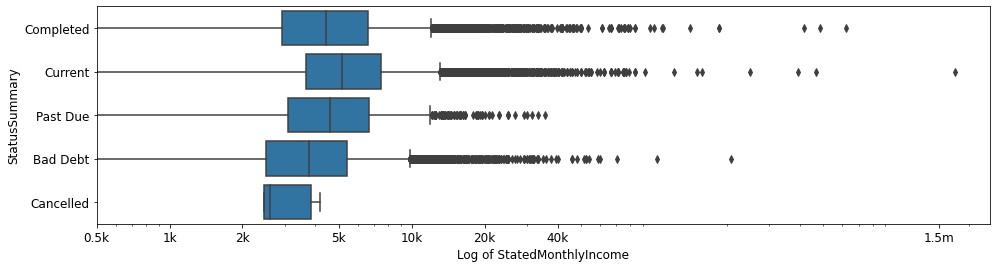

In [43]:
plt.figure(figsize=[16, 4])
sb.boxplot(data=df, y='StatusSummary', x='StatedMonthlyIncome', color=base_color)
plt.xscale('log')
plt.xticks([5e2, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 1.5e6], ['0.5k', '1k', '2k', '5k', '10k', '20k', '40k', '1.5m'])
plt.xlabel('Log of StatedMonthlyIncome');

Looks like cancelled and bad debt loans borrowers have a generally lower monthly income than those with current and completed loans. This is, however not the case with past due loans whose borrowers seem to have a slightly higher distribution than with completed loans.

**Investigating Loan Status against DebtToIncomeRatio**

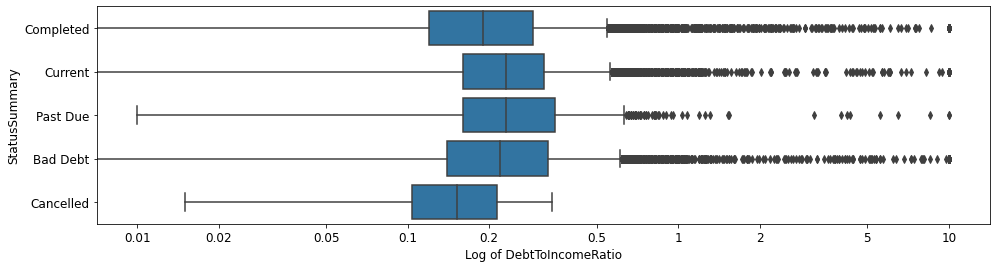

In [44]:
plt.figure(figsize=[16, 4])
sb.boxplot(data=df, y='StatusSummary', x='DebtToIncomeRatio', color=base_color)
plt.xscale('log', base=2)
ticks = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
plt.xticks(ticks, ticks)
plt.xlabel('Log of DebtToIncomeRatio');

Completed loans have a generally lower distribution of DebtToIncome ratio as compared to past due and bad debt loans. Nonetheless, the correlation between both variables does not seem that significant as several status summaries share a similar distribution.

**Investigating Loan Status against Homeownership**

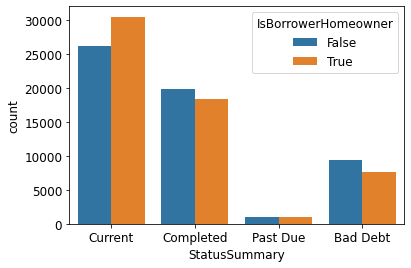

In [45]:
sb.countplot(data=df, x='StatusSummary', hue='IsBorrowerHomeowner',
             order=['Current', 'Completed', 'Past Due', 'Bad Debt']);

It seems that current loan listings is the only category where homeowners are clearly higher than non homeowners. This prompts an investigation between homeownership and date.

**Investigating homeownership against date**

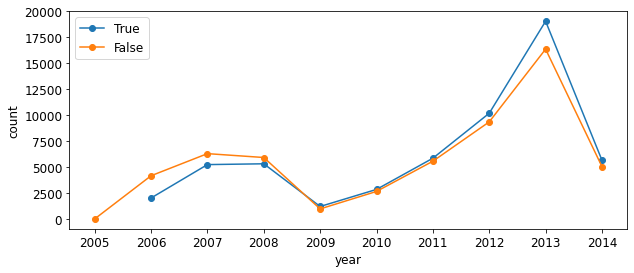

In [46]:
plt.figure(figsize=[10, 4])

df_owner = df[df.IsBorrowerHomeowner == True].groupby('ListingCreationYear', as_index=False)['Term'].count()
df_nowner = df[df.IsBorrowerHomeowner == False].groupby('ListingCreationYear', as_index=False)['Term'].count()

owner = plt.plot(df_owner.ListingCreationYear, df_owner.Term, marker='o')
nowner = plt.plot(df_nowner.ListingCreationYear, df_nowner.Term, marker='o')
year_ticks = np.arange(2005, 2014+1, 1)
plt.xticks(year_ticks, year_ticks)
plt.xlabel('year')
plt.ylabel('count')
plt.legend(['True', 'False']);

Looking at the interaction between date and homeownership, it seems that 2009 is a turning year where the proportion of borrowing homeowners was flipped to become higher than non-owners. Again, this could be interpreted in light of the global 2008 financial crisis which left homeowners more reluctant to opt for mortgage based financing.

**Investigating loan status and loan amount**

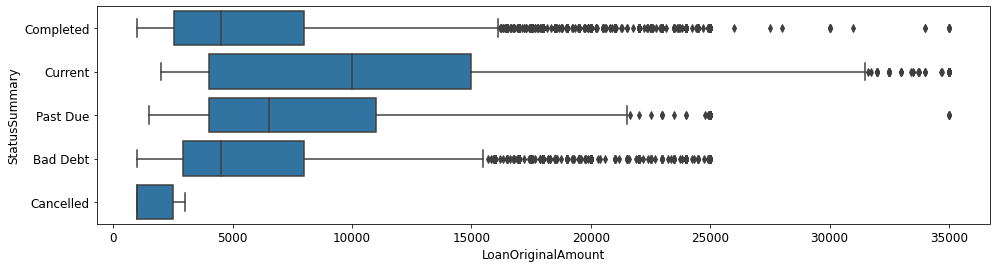

In [47]:
plt.figure(figsize=[16, 4])
sb.boxplot(data=df, y='StatusSummary', x='LoanOriginalAmount', color=base_color);

It seems that loans with a 'current' status have a particularly high loan amount distribution. Completed and bad debt loans have low distributions on. the other hand. This could only be a result of loan amounts increasing over time because completed and bad debt loans are mostly old loans whereas current and past due loans are new ones. So let us have a look next at the change in loan amount over time.

**Investigating lisitng date and loan size**

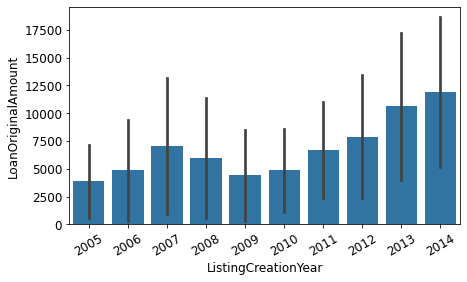

In [48]:
plt.figure(figsize=[7, 4])
sb.barplot(data=df, x='ListingCreationYear', y='LoanOriginalAmount', color=base_color, ci='sd')
plt.xticks(rotation=30);

The average loan amount accross the years is very similar to the distribution of yearly loan listings. There is a drop between 2007 and 2009 but other than that, there is an upward trend with the passing of years.

**Investigating Loan Status against Listing Category**

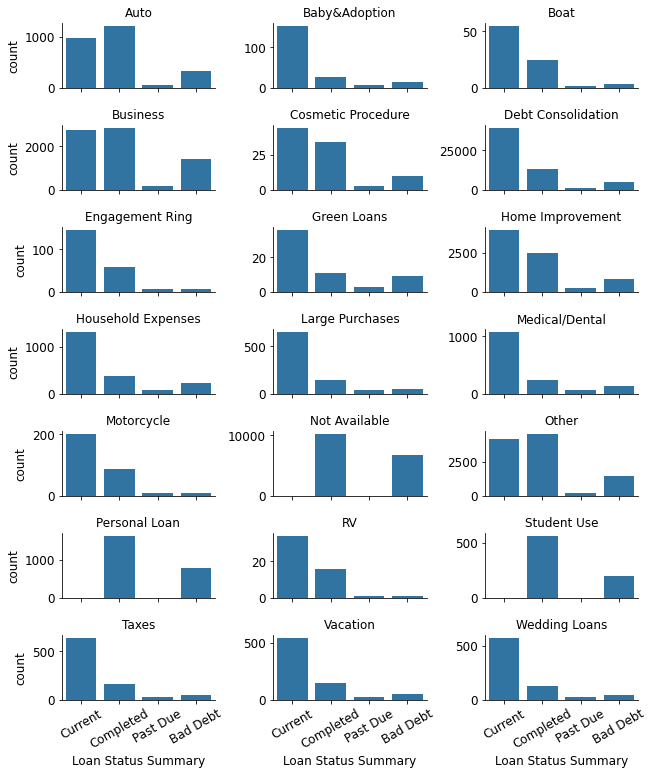

In [49]:
g = sb.FacetGrid(data=df, col='ListingCategory', col_wrap=3, height=1.5, aspect=2, sharey=False)
g.map(sb.countplot, 'StatusSummary', order=['Current', 'Completed', 'Past Due', 'Bad Debt']);
g.set_titles('{col_name}')
g.set_xlabels('Loan Status Summary')
g.set_ylabels('count')
g.set_xticklabels(rotation=30);

In almost all lisitng categories, current and completed loans have the highest proportions while bad debts is significantly low. There is a couple of categories where bad debts has an unusally noticeable proportion such as student, personal, and business loans. 

Let us now turn to investigate the second variable of interest which is interest rate.

**Investigating Interest Rate against Loan Amount**

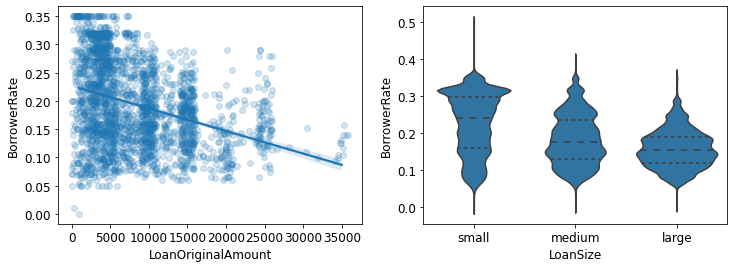

In [50]:
plt.figure(figsize=[12, 4])

plt.subplot(1, 2, 1)
df_sample = df.sample(2500)
sb.regplot(data=df_sample, x='LoanOriginalAmount', y='BorrowerRate', x_jitter=1000,
           scatter_kws={'alpha':1/5}, fit_reg=True)

plt.subplot(1, 2, 2)
sb.violinplot(data=df, x='LoanSize', y='BorrowerRate', color=base_color, inner='quartile');

From the above scatter and violin plots, it seems borrower rate and loan amount are negatively related. However, it does not exactly seem to be a tight trend. For instance, it also seems like there is a baseline at around 0.06 interest rate; also, as the size of loan amount gets smaller, there is more variability in the interest rate range. But then for the largest loans, most interest rates are condensed at the lower half. It seems like other factors might be at play here which could be further pusued during the multivariate exploration.

**Investigating Interest Rate against Loan Term**

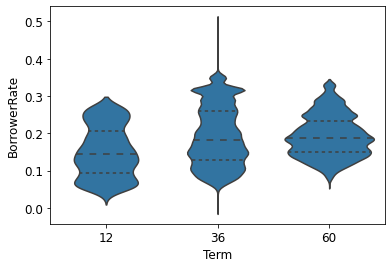

In [51]:
sb.violinplot(data=df, x='Term', y='BorrowerRate', color=base_color, inner='quartile');

It looks like there is an upward going trend between interest rate and loan duration. This, however, might just be a product of the correlation between Term and LoanOriginalAmount which in turn is related to the interest rate variable. So let us have a look at this next.

**Investigating Loan Amount and Term**

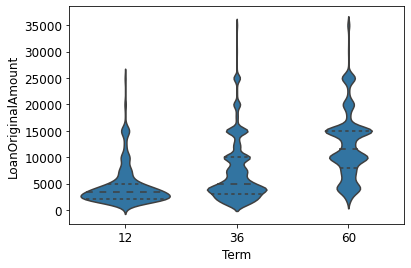

In [52]:
sb.violinplot(data=df, x='Term', y='LoanOriginalAmount', color=base_color, inner='quartile');

The correlation between loan duration and amount is much more apparent than the previoud one between interest rate and duration. While almost 75% of 1 year loans are below USD 5,000, 50% of the 3 year loans are above it and even more than 75% of 5 year loans have an amount of at least USD 8,000. It is generally clear that there is a positive correlation between loan duration and loan size.

**Investigating Interest Rate against Prosper Rating**

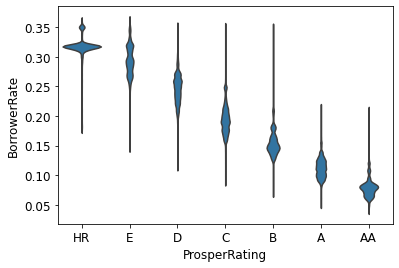

In [53]:
sb.violinplot(data=df, x='ProsperRating', y='BorrowerRate', color=base_color, inner=None);

There is a negative trend between Prosper rating and interest rate. This is simply expected considering that high risk ratings are more prone to becoming bad debts and so the cost of borrowing (i.e. interest rate) must be higher to match this high risk. Let us also have a look at the interaction between rating and loan size.

**Investigating loan size and Prosper rating**

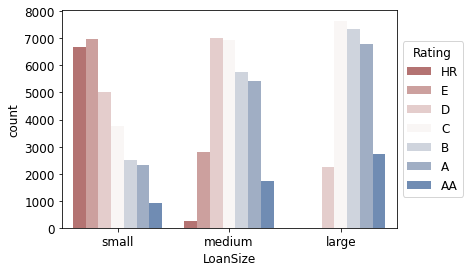

In [54]:
sb.countplot(data=df, x='LoanSize', hue='ProsperRating', palette='vlag_r')
plt.legend(title='Rating', bbox_to_anchor = (1, 0.5), loc = 6);

The distribution of Prosper ratings becomes more and more right skewed as the size of loan gets smaller. This suggests that small loans do not usually have good Prosper ratings. Likewise, large loans have a proportionally low count of 'D' rating no 'E' or 'HR' ratings at all.

**Investigating interest rate and ownership**

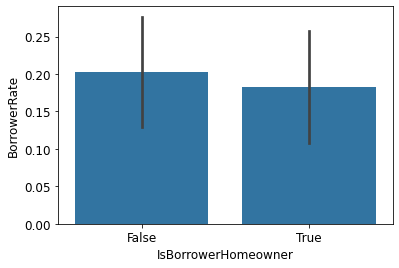

In [55]:
sb.barplot(data=df, y='BorrowerRate', x='IsBorrowerHomeowner', color=base_color, ci='sd');

The avergae borrowing rate for homeowners seem to be lower than non-owners. This could be simply attributed to the lower risk associated with homeowners or to the laws od demand and supply considering that homeowners have an alternative of mortgage based financing.

***
### How did the feature(s) of interest vary with other features in the dataset?

*Loan status*

>There is a strong correlation between loan status and Prosper rating. For instance, combined ratings between 'D' to 'HR' are significantly more evident in bad debt and past due loan listings. As for other variables such as income and debt and debt to income ration, there were no key takeaways suggesting a signifacant correlation to loan status. Moreover, when viewing loan status for each individual listing category, bad debt loans seemed more apparent in 3 specific categories than in other. Those 3 categories are student use, personal, and business loans.

*Interest rate*

>Again, the most apparent correlation here is against Prosper rating. As the rating gets better (i.e. towards 'AA'), the interest rate, that is the cost of borrowing, gets lower. Also, the interest rates for homeowners seemed to generally have a lower average than non=owners. Furthermore, at first sight, it looks like loan amount and interest rate might have a negative relation. This latter trend though might not stand; because when looking at loan size against Prosper rating, it is clear that as loan amount increases, it is most prabably with a 'c' or above rating. This means that most big amout loans will naturally have a lower interest rate because of their lower associated risk.

### Were there any interesting relationships observed between the other features (not the main feature(s) of interest)?

Loan amount/size seems to have multiple interesting interactions with a couple of variables. As mentioned before, Prosper ratings becomes more and more right skewed as the size of loan gets smaller which means most small loans are with a 'c' or below rating. This goes hand in hand with the relation found between loan amount and duration. As the Term of the loan increases, loan size tends to increase as well. Around 50% of the 3 year loans are above USD 5,000 and even more than 75% of the 5 year loans have an amount of at least USD 8,000. For 1 year loans however, around 75% of their dustribution are under the USD 5,000 mark.

One more interesting interaction is between listing date and homeownership. The year 2009 seemes to be a turning year for homeowners. Before 2009, non-homeowning borrowers had a higher count of loan listings. After 2009, however, homeowners have a higher count and the difference keeps slightly widening from one year to another in favor of homeowners.
***

<a id='multivariate'></a>
## Multivariate Exploration

Let us try adding more layers to the interaction between loan amount and interest rate.

**Investigating loan amount and interest rate by loan duration**

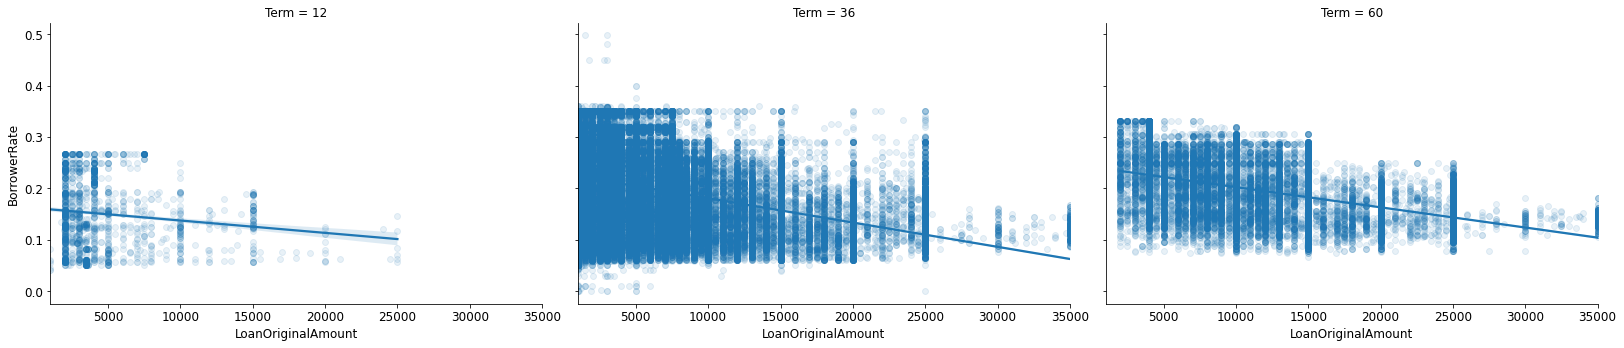

In [56]:
g = sb.FacetGrid(data = df, col = 'Term', height = 5, aspect=1.5)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha':1/10})
g.add_legend();

The negative correlation seems to hold except that the distribution is more condensed at the 3 year loan duration. It does not seem that Tem is strong predictive variable for the interest rate.

**Investigating loan amount and interest rate by Prosper rating**

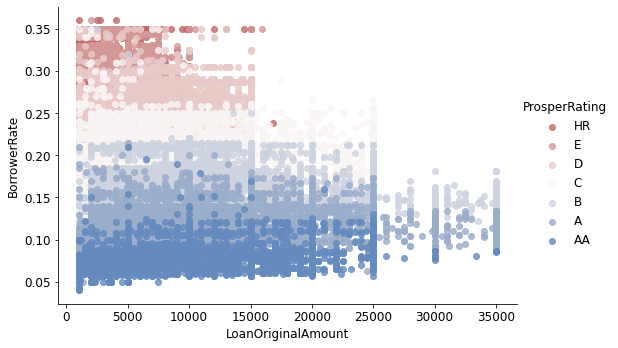

In [57]:
g = sb.FacetGrid(data = df, hue = 'ProsperRating', height = 5, aspect=1.5, palette='vlag_r')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerRate', alpha=0.8)
g.add_legend();

When adding the Prosper rating variable to the interaction between interest rate and loan size, it is clear that the seemingly negative correlation from before does not stand anymore. Prosper Rating is a much stronger predictive variable than loan size when it comes to interest rate. The coincidence that loan size and Prosper rating are also correlated (i.e. most bad ratings are small loans where as big size loans usually have a 'c' or above rating.

Let us also facet this correlation to make it seem visible that loan size alone behaves differently for any of the Prosper ratings.

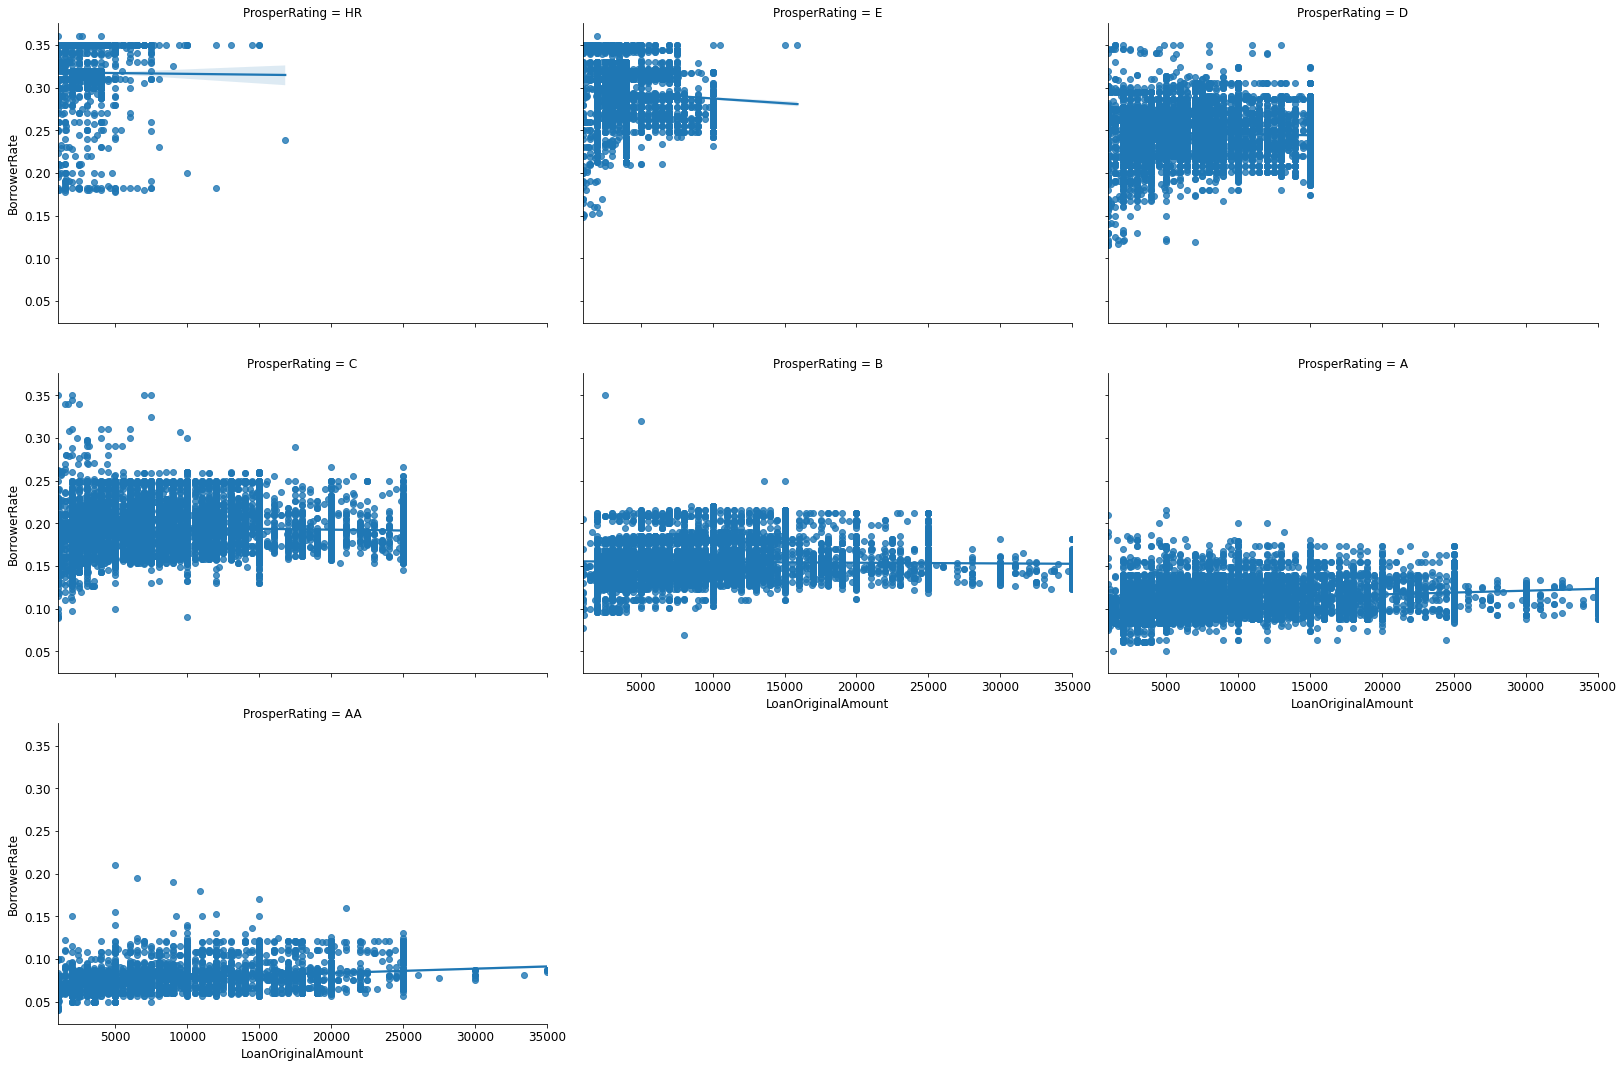

In [58]:
g = sb.FacetGrid(data = df, col = 'ProsperRating', col_wrap=3, height = 5, aspect=1.5, palette='viridis_r')
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerRate')
g.add_legend();

From the above facetgrid, it is clear that loan amount does not predict changes in interest rate. Although, one interesting takeaway is that the spread of interest rate gets wider as the rating gets riskier. For 'AA'; ratings for example, the spread is quite low with most interest rates between 5% to 12%.

**Investigating interest rate and homeownership by year**

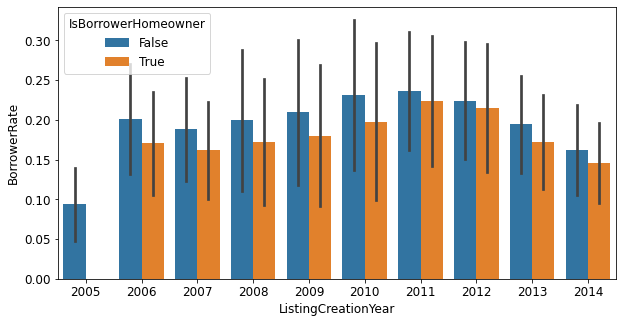

In [59]:
plt.figure(figsize=[10, 5])
sb.barplot(data=df, y='BorrowerRate', x='ListingCreationYear', hue='IsBorrowerHomeowner', ci='sd');

As established from before, the average interest rate is generally lower for homeowners. But because most borrowers are now becoming more and more consistent of homeowners, it seems the gap in average interest rate between both categories is getting closer than before 2011. The explanation for this might the market responding to more and more homeowners opting for loans instead of mortgage based financing. In other words, because homeonwer's demand increases, their cost of borrowing increases as well.

***
### Were there features that strengthened each other in terms of looking at the feature(s) of interest?

The relationship between loan amount and interest rate, which at first seemed to be negatively correlated, does not hold when adding the Prosper rating variable. The only reason it seemed so is because ratings and loan size are correlated as there are big loans which are very risky and brrowing rate is naturally lower for low risk loans.

Although not a very significant patterns, the difference in interest rate due to homeownership status seem to be converging from one year to another.

### Were there any interesting or surprising interactions between features?

Not particularly.
***